In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from ipywidgets import widgets

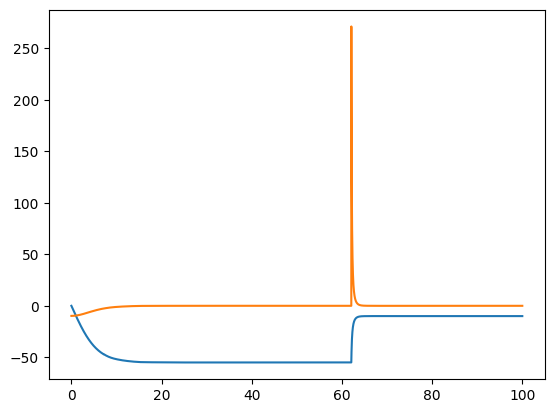

In [2]:
g = 9.8
kg = g / 55**2
a=True
def derivadasA(X, t):
        y, vy = X
        doty= vy
        if(y>800):
                dotvy = -g + vy**2 * kg
               
        else:
                 
                
                        
                dotvy = -g + vy**2 * g/(10**2)
        
        return np.array([doty, dotvy])

Nt = 10000
tmax = 100

t = np.linspace(0, tmax, Nt)
X0 = [4000,0]
res = integrate.odeint(derivadasA, X0, t,atol=1)
A = np.array([derivadasA(res[i],t[i]) for i in range(len(t))])
plt.plot(t, A)



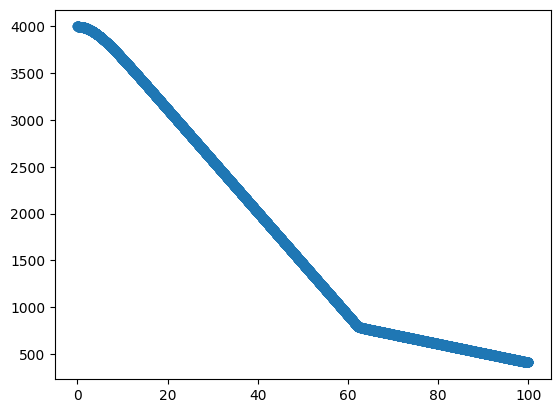

In [3]:
plt.scatter(t,res.T[0])


In [4]:

@widgets.interact(k1=(1, 10, 0.1), k2=(1, 10, 0.1), a0=(10, 10000, 10))
def graph(k1, k2, a0):
    def derivadasA(X, t):
        x, y = X
        dotx = k1 * a0 - k1 * x
        doty = k2 * x - k2 * y
        return np.array([dotx, doty])

    Nt = 10000
    tmax = 2

    t = np.linspace(0, tmax, Nt)
    X0 = [0, 0]
    res = integrate.odeint(derivadasA, X0, t)
    plt.plot(t, res.T[0])
    plt.plot(t, res.T[1])
    plt.show()

interactive(children=(FloatSlider(value=5.0, description='k1', max=10.0, min=1.0), FloatSlider(value=5.0, desc…

In [5]:

@widgets.interact(alpha=(0, 10, 0.1), beta=(1, 10, 0.1), a0=(10, 10000, 10))
def graph(alpha, beta, a0):
    def derivadasA(X, t):
        x, y = X
        dotx = - alpha * x + x*y
        doty = 1 - beta*y - x**2
        return np.array([dotx, doty])

    Nt = 10000
    tmax = 2

    t = np.linspace(0, tmax, Nt)
    X0 = [0, 0]
    res = integrate.odeint(derivadasA, X0, t)
    plt.plot(t, res.T[0])
    plt.plot(t, res.T[1])
    plt.show()

interactive(children=(FloatSlider(value=5.0, description='alpha', max=10.0), FloatSlider(value=5.0, descriptio…

In [6]:

@widgets.interact(alpha=(0, 2, 0.1), beta=(0, 2, 0.1), density=(0.01, 3, 0.01))
def graph(alpha, beta, density):
    def derivadasA(X):
        v, p = X
        dotv = 1 - beta*v - p**2
        dotp = - alpha * p + p*v
        return np.array([dotv, dotp])
    
    w_1, w_2 = (-5, 5)
    Y, X = np.mgrid[w_1:w_2:100j,w_1:w_2:100j]
    x,y = derivadasA([X, Y])
    plt.figure(figsize=(12, 10), dpi=80)

    plt.streamplot(X, Y, x, y, density=[density,density], broken_streamlines = False)
    plt.scatter(alpha,np.sqrt(1-beta*alpha),color='red',s=200)
    plt.scatter(1/beta,0,color='red',s=200)

interactive(children=(FloatSlider(value=1.0, description='alpha', max=2.0), FloatSlider(value=1.0, description…

In [7]:

@widgets.interact(rho=(0, 2, 0.1), beta=(0, 2, 0.1), density=(0.01, 3, 0.01))
def graph(rho, beta, density):
    def derivadasA(X):
        h, p = X
        doth = rho*h - rho*h*p
        dotp = 1/rho*(p*h - p)
        return np.array([doth, dotp])
    
    w_1, w_2 = (0, 5)
    Y, X = np.mgrid[w_1:w_2:100j,w_1:w_2:100j]
    x,y = derivadasA([X, Y])
    plt.figure(figsize=(12, 10), dpi=80)

    plt.streamplot(X, Y, x, y, density=[density,density], broken_streamlines = False)

interactive(children=(FloatSlider(value=1.0, description='rho', max=2.0), FloatSlider(value=1.0, description='…

In [8]:

@widgets.interact(rho=(0, 2, 0.1), beta=(0, 2, 0.1), density=(0.01, 3, 0.01))
def graph(rho, beta, density):
    
    w_1, w_2 = (0, 5)
    Y, X = np.mgrid[w_1:w_2:100j,w_1:w_2:100j]
    plt.figure(figsize=(12, 10), dpi=80)

    plt.contourf(X, Y, rho*np.log(Y) + (1/rho) *  np.log(X) - rho*Y - (1/rho)*X, density=[density,density])

interactive(children=(FloatSlider(value=1.0, description='rho', max=2.0), FloatSlider(value=1.0, description='…

In [9]:
def metodoEulerMemoria(derivada,puntoMemoria,valorMemoria, paso, objetivo, origen, valorInicial):
    #Asumiendo que origen < objetivo
    valorMemoria.extend([valorInicial])
    valores = valorMemoria
    puntoMemoria.extend([origen])
    puntos = puntoMemoria
    puntoActual = origen
    valorActual = valorInicial
    indiceAnterior = 0
    while(puntoActual < objetivo):
        valorActual = valorActual + paso * derivada(puntoActual,valorActual,valores[indiceAnterior])
        puntoActual = puntoActual + paso
        indiceAnterior += 1
        puntos.append(puntoActual)
        valores.append(valorActual)
    return puntos, valores


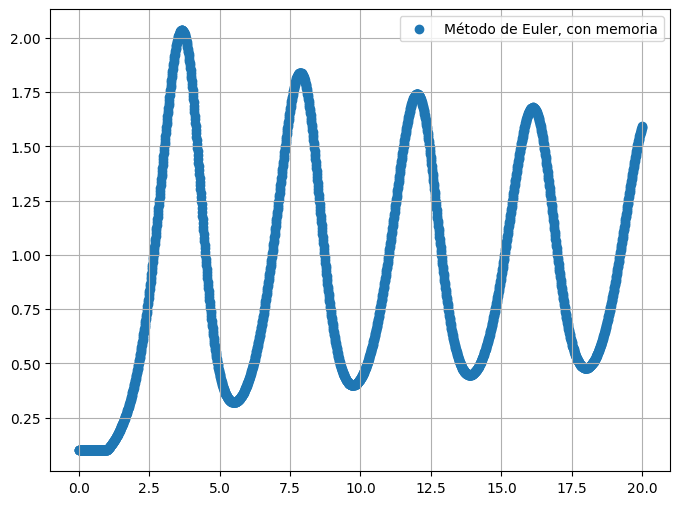

In [10]:
r = 1.6
k = 1

paso = 0.01
objetivo = 20
origen = 1
longitudMemoria = 1
valorInicial = 0.1
puntoMemoria = [0]
valorMemoria = [valorInicial]
for i in range(1,int(longitudMemoria / paso)):
    puntoMemoria.append(puntoMemoria[i-1] + paso)
    valorMemoria.append(valorInicial)

puntos, valores = metodoEulerMemoria(lambda t, f,fanterior: r * f * (1- fanterior /k), puntoMemoria,valorMemoria,paso, objetivo, origen, valorInicial)

x_values = np.array(puntos)


# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.scatter(puntos, valores, label='Método de Euler, con memoria')

plt.legend()
plt.grid(True)
plt.show()

In [12]:

@widgets.interact(alpha=(0, 200, 1), C=(0, 7.2e6, 0.1), u0=(0, 4000, 0.1), Tr=(5, 50, 1), Ta=(5, 50, 1),T0 =(5, 50, 1),  delta = (0, 10, 0.1), step = (0.001, 10, 0.1), end = (0, 400000, 0.1))
def graph(alpha, C, u0, Tr, Ta,T0, delta,step,end):
    def derivadasA(t,T):
        dotT = alpha/C * (Ta - u0/alpha - T)
        
        return dotT
        
    def derivadasB(t, T):
        dotT = alpha/C * (Ta - T)
        
        return dotT

    def metodoEulerHisteresis(paso, objetivo, origen, valorInicial):
        #Asumiendo que origen < objetivo
        valores = [valorInicial]
        puntos = [origen]
        puntoActual = origen
        valorActual = valorInicial
        while(puntoActual < objetivo):
            while(puntoActual < objetivo and valorActual > Tr - delta):
                valorActual = valorActual + paso * derivadasA(puntoActual,valorActual)
                puntoActual = puntoActual + paso
                puntos.append(puntoActual)
                valores.append(valorActual)
            while(puntoActual < objetivo and valorActual < Tr + delta):
                valorActual = valorActual + paso * derivadasB(puntoActual,valorActual)
                puntoActual = puntoActual + paso
                puntos.append(puntoActual)
                valores.append(valorActual)
        return puntos, valores
    puntos, valores = metodoEulerHisteresis(step, end, 0, T0)
    plt.plot(puntos,valores)
    plt.ylim(Tr - delta - 5, T0 + 5)

interactive(children=(IntSlider(value=100, description='alpha', max=200), FloatSlider(value=3600000.0, descrip…

In [13]:

@widgets.interact(A=(0, 2, 0.1), C=(0, 2, 0.1), density=(0.01, 3, 0.01))
def graph(A, C, density):
    def derivadasA(X):
        x, y = X
        dotx = (A - y) * x
        doty = (C - x) * y
        return np.array([dotx, doty])
    
    w_1, w_2 = (0, 5)
    Y, X = np.mgrid[w_1:w_2:100j,w_1:w_2:100j]
    x,y = derivadasA([X, Y])
    plt.figure(figsize=(12, 10), dpi=80)

    plt.streamplot(X, Y, x, y, density=[density,density], broken_streamlines = False)

interactive(children=(FloatSlider(value=1.0, description='A', max=2.0), FloatSlider(value=1.0, description='C'…